# Anime Analysis 

In [252]:
import pandas as pd
import numpy as np
import re

In [253]:
df = pd.read_pickle("anime_df.pkl")
#df.to_pickle("anime_df.pkl")

In [254]:
df

,Rating,Votes,Title,Alt Title,Format,Episodes,Duration,Start Year,End Year,Studio,Tags,Description
0,9.410,73986,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64,NaN,2009,2010,[Bones],"[Action, Adventure, Drama, Fantasy, Mystery, S...",The foundation of alchemy is based on the law ...
1,9.356,29247,your name.,Kimi no Na wa.,Movie,1,107,2016,2016,[CoMix Wave Inc.],"[Drama, Romance, Body Swapping, Opposites Attr...",Mitsuha and Taki are two total strangers livin...
2,9.334,19592,A Silent Voice,Koe no Katachi,Movie,1,130,2016,2016,[Kyoto Animation],"[Drama, Melancholy, School Life, Bullying, Mat...","After transferring into a new school, a deaf g..."
3,9.320,11195,Haikyuu!! Karasuno High School vs Shiratorizaw...,Haikyuu!! 3rd Season: Karasuno High vs. Shira...,TV,10,NaN,2016,2016,[Production I.G],"[Shounen, Sports, Animeism, School Club, Schoo...","Picking up where the second season ended, the ..."
4,9.296,18788,My Hero Academia 3,Boku no Hero Academia 3,TV,25,NaN,2018,2018,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Super...",Third season of My Hero Academia.
5,9.288,2939,Mob Psycho 100 II,NaN,TV,12,NaN,2019,NaN,[Bones],"[Action, Comedy, Shounen, Psychic Powers, Psy...",Second Season of Mob Psycho 100.
6,9.274,15322,Haikyuu!! Second Season,NaN,TV,25,NaN,2015,2016,[Production I.G],"[Shounen, Sports, School Club, School Life, To...","After losing to Aoba Johsai at the Inter-High,..."
7,9.266,5375,Gintama Kanketsu-hen: Yorozuya yo Eien Nare,Gintama The Movie: The Final Chapter - Be Fore...,Movie,1,111,2013,2013,[Sunrise],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...","While watching a movie, Gintoki comes upon a ""..."
8,9.264,29623,My Hero Academia 2,Boku no Hero Academia 2,TV,25,NaN,2017,2017,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Schoo...",In a world where eighty percent of the populat...
9,9.262,6192,Gintama (2015),Gintama°,TV,51,NaN,2015,2016,[BN Pictures],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...",Fourth season of Gintama.


In [255]:
df['Votes'].astype(float).min()

10.0

In [256]:
df.dtypes

Rating          float64
Votes            object
Title            object
Alt Title        object
Format         category
Episodes         object
Duration         object
Start Year     category
End Year       category
Studio           object
Tags             object
Description      object
dtype: object

In [257]:
df.isnull().sum()

Rating         2717
Votes          2717
Title             0
Alt Title      7482
Format            0
Episodes        387
Duration       5342
Start Year      187
End Year        343
Studio         3724
Tags            338
Description    5298
dtype: int64

In [258]:
df['Format'].value_counts()

TV             4215
Movie          2279
OVA            1971
Web            1129
Music Video    1124
DVD Special     776
Other           646
TV Special      541
Name: Format, dtype: int64

Text(0, 0.5, 'Number of Pieces')

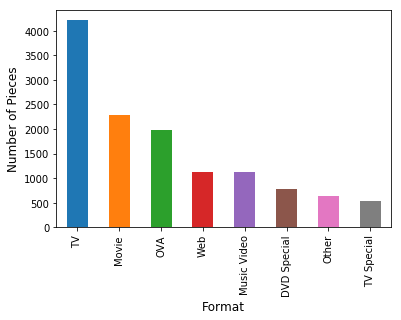

In [259]:
%matplotlib inline
ax = df['Format'].value_counts().plot(kind='bar')
ax.set_xlabel('Format', fontsize=12)
ax.set_ylabel('Number of Pieces', fontsize=12)

Text(0, 0.5, 'Number of Pieces')

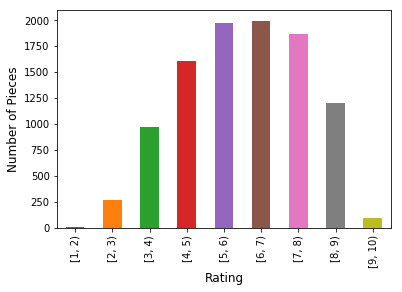

In [260]:
bins = range(1, 11)
ax = pd.cut(list(df['Rating']), bins, right=False).value_counts().plot(kind='bar')
ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Number of Pieces', fontsize=12)

Text(0, 0.5, 'Number of Pieces')

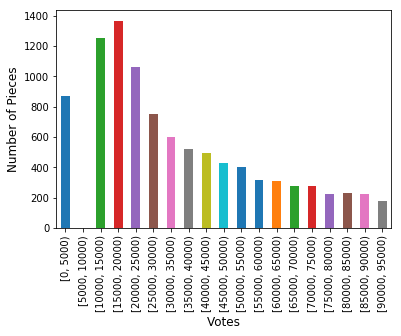

In [261]:
bins = range(0, 100000, 5000)
ax = pd.cut(list(df['Votes']), bins, right=False).value_counts().plot(kind='bar')
ax.set_xlabel('Votes', fontsize=12)
ax.set_ylabel('Number of Pieces', fontsize=12)

Text(0, 0.5, 'Number of Highly Rated Anime\n (Rating >= 7)')

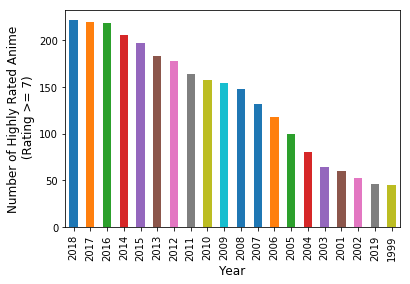

In [262]:
ax = df.loc[df['Rating'] >= 7, 'Start Year'].value_counts().head(20).plot(kind='bar')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Highly Rated Anime\n (Rating >= 7)', fontsize=12)

Text(0, 0.5, 'Number of Good Pieces')

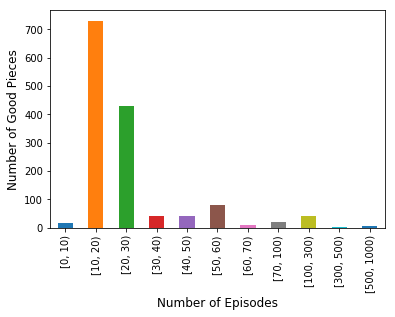

In [263]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100, 300, 500, 1000]
ax = pd.cut(list(df.loc[(df['Format'] == 'TV') & (df['Rating'] >= 7), 'Episodes'].astype(float)), bins, right=False).value_counts().plot(kind='bar')
ax.set_xlabel('Number of Episodes', fontsize=12)
ax.set_ylabel('Number of Good Pieces', fontsize=12)

Text(0, 0.5, 'Number of Mediocre Pieces')

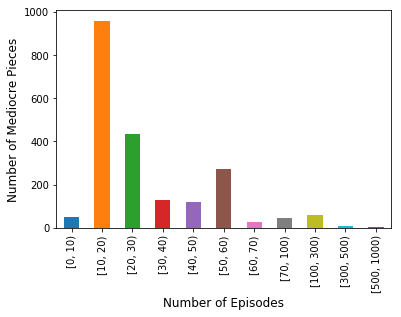

In [264]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100, 300, 500, 1000]
ax = pd.cut(list(df.loc[(df['Format'] == 'TV') & (df['Rating'] < 7), 'Episodes'].astype(float)), bins, right=False).value_counts().plot(kind='bar')
ax.set_xlabel('Number of Episodes', fontsize=12)
ax.set_ylabel('Number of Mediocre Pieces', fontsize=12)

Text(0, 0.5, 'Ratio of Good/Mediocre')

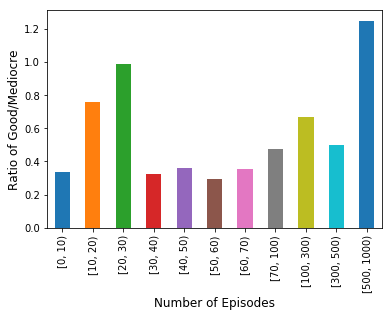

In [265]:
good = pd.cut(list(df.loc[(df['Format'] == 'TV') & (df['Rating'] >= 7), 'Episodes'].astype(float)), bins, right=False).value_counts()
mediocre = pd.cut(list(df.loc[(df['Format'] == 'TV') & (df['Rating'] < 7), 'Episodes'].astype(float)), bins, right=False).value_counts() 
ratio = [int(b) / int(m) for b,m in zip(good, mediocre)]
ax = pd.Series(ratio, index=good.index, name='Ratio').plot(kind='bar')
ax.set_xlabel('Number of Episodes', fontsize=12)
ax.set_ylabel('Ratio of Good/Mediocre', fontsize=12)

In [266]:
df.loc[(df['Rating'] >= 7) & (df['Episodes'].astype(float) >= 500) & (df['Episodes'].astype(float) < 1000)]

,Rating,Votes,Title,Alt Title,Format,Episodes,Duration,Start Year,End Year,Studio,Tags,Description
227,8.796,53167,One Piece,NaN,TV,878,NaN,1999,NaN,[Toei Animation],"[Action, Adventure, Comedy, Fantasy, Shounen, ...",Long ago the infamous Gol D. Roger was the str...
579,8.472,67836,Naruto Shippuden,NaN,TV,500,NaN,2007,2017,[Studio Pierrot],"[Action, Drama, Fantasy, Shounen, Hand to Hand...",Two and a half years have passed since the end...
974,8.198,13599,Detective Conan,"Case Closed, Meitantei Conan",TV,935,NaN,1996,NaN,"[TMS Entertainment, V1 Studio]","[Drama, Mystery, Shounen, Age Transformation, ...",Shinichi Kudo is a famous teenage detective wh...
2279,7.446,464,Doraemon (2005),Doraemon: Gadget Cat from the Future,TV,553,NaN,2005,NaN,[Shin-Ei Animation],"[Adventure, Comedy, Shounen, Cats, Family Frie...",Robotic cat Doraemon is sent back in time from...
2896,7.130,5416,Crayon Shin-chan,NaN,TV,992,NaN,1992,NaN,[Shin-Ei Animation],"[Comedy, Ecchi, Slice of Life, Crude, Mature T...",Shinnosuke Nohara is a crude and rude five-yea...


In [267]:
def contains (col, elems):
    booleans = []
    for tags in df[col]:
        exists = True
        for item in elems:
            if type(tags) == float:
                exists = False
            elif item not in tags:
                exists = False
        if type(tags) == float:
            booleans.append(False)                   
        elif exists:
            booleans.append(True)
        else:
            booleans.append(False)
    return booleans

In [268]:
df.loc[np.array(contains('Tags', ['Action','Adventure','Fantasy', 'Magic', 'Shounen', 'Comedy']))]

,Rating,Votes,Title,Alt Title,Format,Episodes,Duration,Start Year,End Year,Studio,Tags,Description
41,9.102,8531,That Time I Got Reincarnated as a Slime,Tensei Shitara Slime Datta Ken,TV,24,NaN,2018,2019,[8-Bit],"[Action, Adventure, Comedy, Fantasy, Shounen, ...",Lonely thirty-seven-year-old Satoru Mikami is ...
83,9.010,3773,Fairy Tail (2018),NaN,TV,25,NaN,2018,NaN,"[Bridge, A-1 Pictures, CloverWorks]","[Action, Adventure, Comedy, Fantasy, Shounen, ...",The final season of Fairy Tail.
129,8.914,17897,Magi: The Kingdom of Magic,NaN,TV,25,NaN,2013,2014,[A-1 Pictures],"[Action, Adventure, Comedy, Fantasy, Shounen, ...",Equipped with a charm to mask his powers as a ...
202,8.820,22358,Fairy Tail 2,NaN,TV,102,NaN,2014,2016,"[Bridge, A-1 Pictures]","[Action, Adventure, Comedy, Fantasy, Shounen, ...","Natsu, Lucy, and their fellow Fairy Tail mages..."
266,8.756,7034,Magi: Adventure of Sinbad,Magi: Sinbad no Bouken,TV,13,NaN,2016,2016,[Lay-duce],"[Action, Adventure, Comedy, Fantasy, Shounen, ...","Thirty years before the events of Magi, a brav..."
368,8.664,4202,Magi: Adventure of Sinbad OVA,Magi: Sinbad no Bouken OVA,OVA,5,NaN,2014,2015,[Lay-duce],"[Action, Adventure, Comedy, Fantasy, Shounen, ...",The story takes place 30 years before the even...
378,8.656,60085,Fairy Tail,NaN,TV,175,NaN,2009,2013,"[Satelight, A-1 Pictures]","[Action, Adventure, Comedy, Drama, Fantasy, Sh...",Lucy is a seventeen-year-old mage with the pow...
392,8.642,23697,Magi: The Labyrinth of Magic,NaN,TV,25,NaN,2012,2013,[A-1 Pictures],"[Action, Adventure, Comedy, Fantasy, Shounen, ...","In a sand-swept land of caravans, brigands and..."
5515,5.822,691,That Time I Got Reincarnated as a Slime: Veldo...,"Tensei Shitara Slime Datta Ken: Kanwa ""Veldora...",TV Special,1,NaN,2019,2019,[8-Bit],"[Action, Adventure, Comedy, Fantasy, Shounen, ...",Ifrit and Veldora recap Rimuru's journey as th...


In [269]:
df.loc[(np.array(contains('Studio', ['Bones']))) & (np.array(contains('Tags', ['Drama']))) & (df['Rating'] >= 9)]

,Rating,Votes,Title,Alt Title,Format,Episodes,Duration,Start Year,End Year,Studio,Tags,Description
0,9.410,73986,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64,NaN,2009,2010,[Bones],"[Action, Adventure, Drama, Fantasy, Mystery, S...",The foundation of alchemy is based on the law ...
4,9.296,18788,My Hero Academia 3,Boku no Hero Academia 3,TV,25,NaN,2018,2018,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Super...",Third season of My Hero Academia.
8,9.264,29623,My Hero Academia 2,Boku no Hero Academia 2,TV,25,NaN,2017,2017,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Schoo...",In a world where eighty percent of the populat...
70,9.046,36568,My Hero Academia,Boku no Hero Academia,TV,13,NaN,2016,2016,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Schoo...",Izuku has dreamt of being a hero all his life—...


In [270]:
df.groupby('Format')['Rating'].mean()

Format
DVD Special    6.177924
Movie          6.189008
Music Video    4.661024
OVA            6.049877
Other          5.227216
TV             6.476866
TV Special     6.318064
Web            5.093503
Name: Rating, dtype: float64

In [271]:
df.groupby('Format')['Rating'].median()

Format
DVD Special    6.174
Movie          6.386
Music Video    4.436
OVA            6.038
Other          5.128
TV             6.564
TV Special     6.436
Web            4.916
Name: Rating, dtype: float64

In [272]:
def ratingGroupSplitter(df, ind, col):
    if df.loc[ind, col] == np.NaN:
        return 'Null'
    elif df.loc[ind, col] >= 7:
        return 'Good'
    else:
        return 'Mediocre'

df.groupby(lambda x: ratingGroupSplitter(df, x, 'Rating'))['Title'].count()

Good        3153
Mediocre    9528
Name: Title, dtype: int64

#### Plot relationship between movie duration and rating

In [319]:
df.loc[(df['Rating'] >= 9) & (df['Rating'] < 10) & (df['Format'] == 'Movie')].sort_values(['Rating'], ascending=False)['Duration'].astype(float).mean()

108.3157894736842

In [313]:
ratings = df.loc[(df['Format'] == 'Movie'), 'Rating']
durations = df.loc[(df['Format'] == 'Movie'), 'Duration']
df.plot(x=durations, y=ratings, kind='scatter')

ValueError: cannot index with vector containing NA / NaN values